# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

#### EKG ve spektru

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xsamoi00.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xsamoi00.wav")


--2023-12-08 12:58:38--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xsamoi00.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xsamoi00.wav.1’

xsamoi00.wav.1      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-08 12:58:39 (195 MB/s) - ‘xsamoi00.wav.1’ saved [10044/10044]

--2023-12-08 12:58:39--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.3’

FIB.wav.3           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-0

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

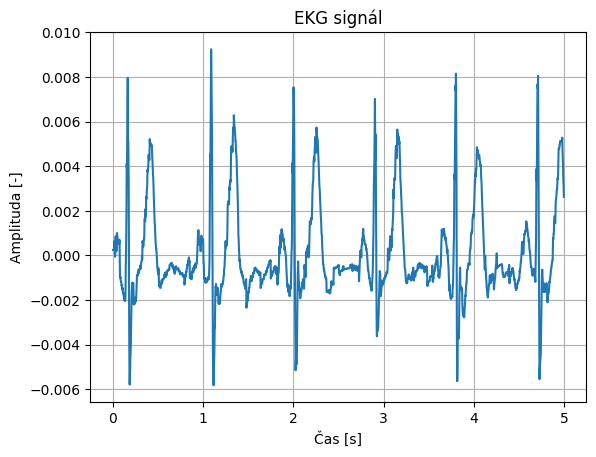

In [70]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, freqz, filtfilt
from statsmodels.graphics.tsaplots import plot_acf

# Nahrání EKG signálu z WAV souboru
path = "xsamoi00.wav"
sgl, fs = sf.read(path)

#  5-sekundový úsek
if len(sgl.shape) > 1:  # Check if the signal has multiple channels
    sgl = sgl[:, 0]  # Take only one channel

sgl = sgl[:fs * 5]
t = np.arange(0, len(sgl) / fs, 1 / fs)

plt.plot(t, sgl)
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda [-]')
plt.title('EKG signál')
plt.grid(True)
plt.show()


b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

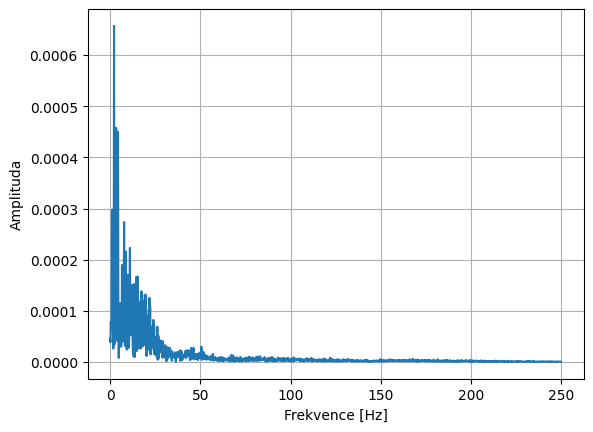

In [17]:
# spektrum z 5 sekundového úseku

def res_spec(sgl, fs):
    N = len(sgl)
    freq = np.arange(0, fs / 2, fs / N)
    spectrum = np.fft.fft(sgl) / N
    spectrum = spectrum[:N // 2]
    plt.plot(freq, np.abs(spectrum))
    plt.xlabel('Frekvence [Hz]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    plt.show()

res_spec(sgl, fs)

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušení je obvykle způsobeno elektrickým šumem, , který je způsoben přítomností elektrické sítě v okolí nebo samotného zařízení, které snímá EKG.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

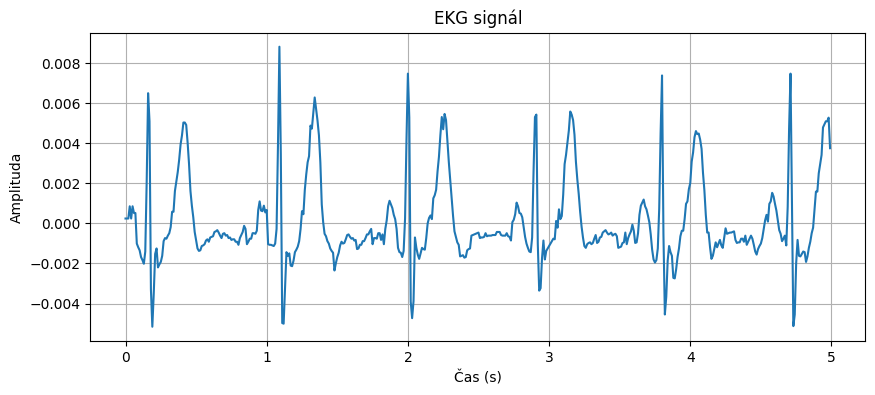

In [33]:
# Převzorkování signálu
fs_new = 100
sgl_new = sgl[::fs // fs_new]
t_new = np.arange(0, len(sgl_new) / fs_new, 1 / fs_new)

# Zobrazení signálu
plt.figure(figsize=(10, 4))
plt.plot(t_new, sgl_new)
plt.title('EKG signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

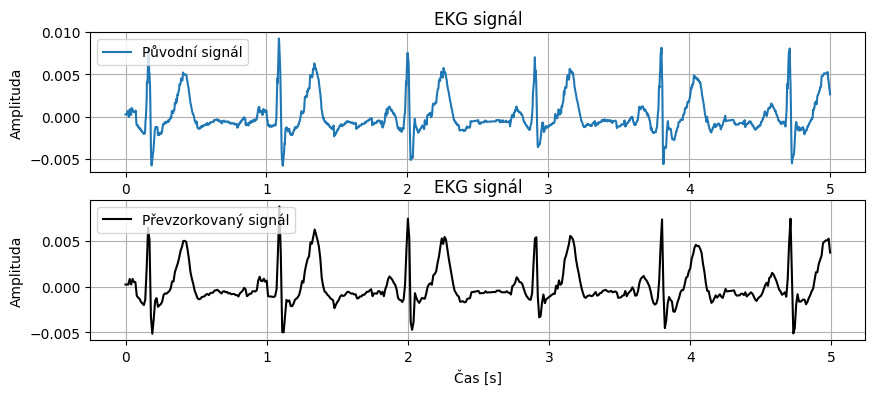

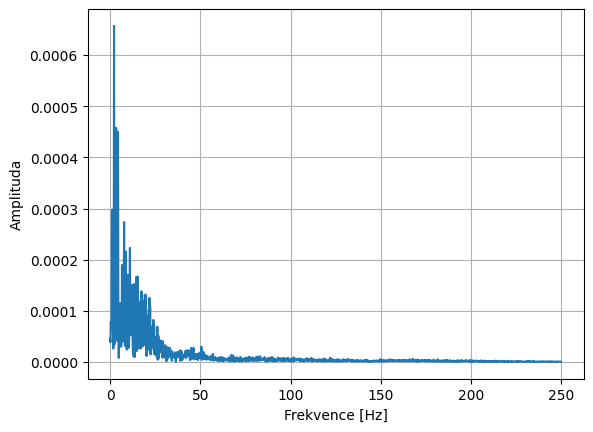

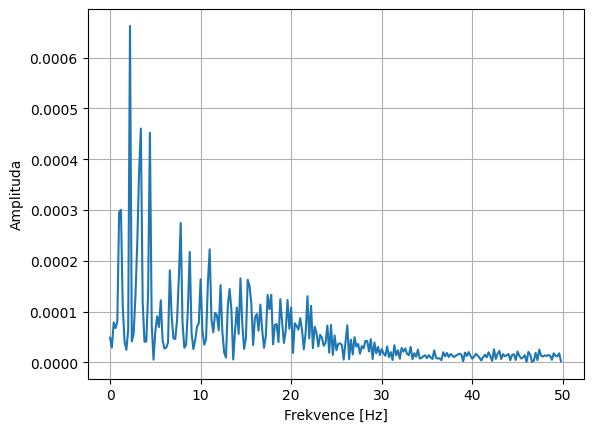

In [34]:
# Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, sgl, label='Původní signál')
plt.title('EKG signál')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_new, sgl_new, label='Převzorkovaný signál', color='black')
plt.title('EKG signál')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()

res_spec(sgl, fs)
res_spec(sgl_new, fs_new)

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

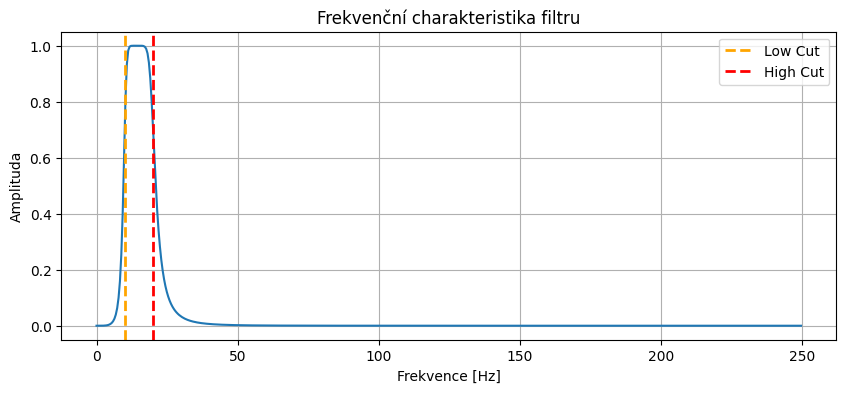

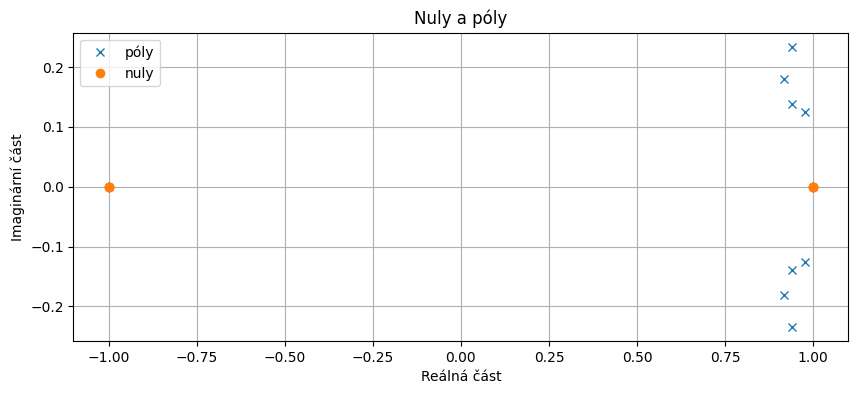

In [57]:
# Vytvoření filtru
f_low = 10
f_high = 20
order = 4
b, a = butter(order, [f_low / (fs / 2), f_high / (fs / 2)], btype='band')
w, h = freqz(b, a, fs=fs)

# Filtrace signálu
def frek_char(b, a, fs):
    w, h = freqz(b, a, fs=fs)
    plt.figure(figsize=(10, 4))
    plt.plot(w, np.abs(h))
    plt.axvline(f_low, color='orange', linestyle='dashed', linewidth=2, label='Low Cut')
    plt.axvline(f_high, color='red', linestyle='dashed', linewidth=2, label='High Cut')
    plt.title('Frekvenční charakteristika filtru')
    plt.xlabel('Frekvence [Hz]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    plt.legend()
    plt.show()

# Zobrazení nul a pólů
def nuly_poly(a, b):
    plt.figure(figsize=(10, 4))
    plt.plot(np.real(np.roots(a)), np.imag(np.roots(a)), 'x', label='póly')
    plt.plot(np.real(np.roots(b)), np.imag(np.roots(b)), 'o', label='nuly')
    plt.legend()
    plt.title('Nuly a póly')
    plt.xlabel('Reálná část')
    plt.ylabel('Imaginární část')
    plt.grid(True)
    plt.show()

frek_char(b, a, fs)
nuly_poly(a, b)

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


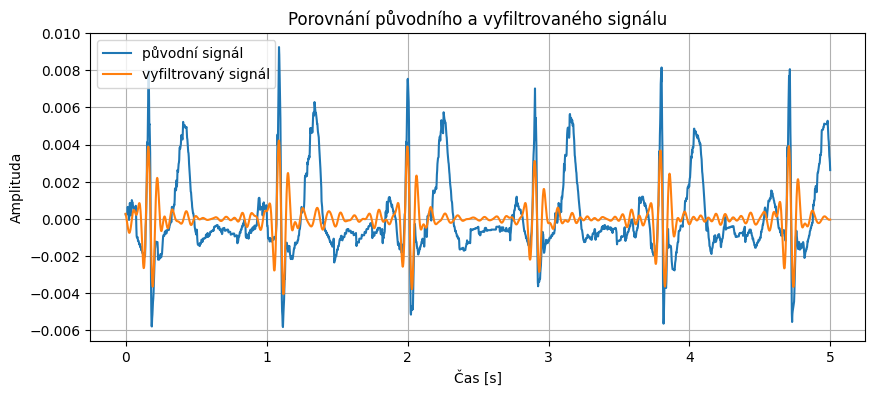

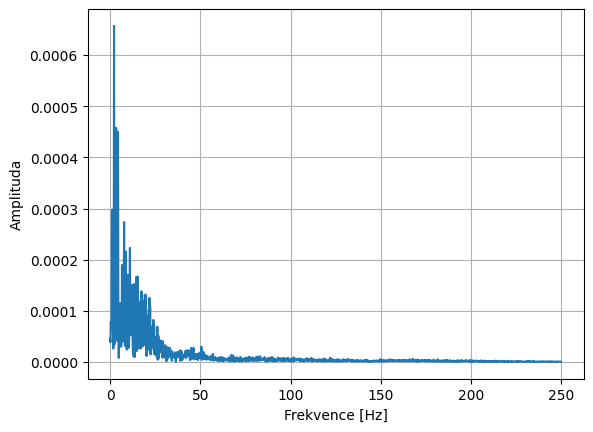

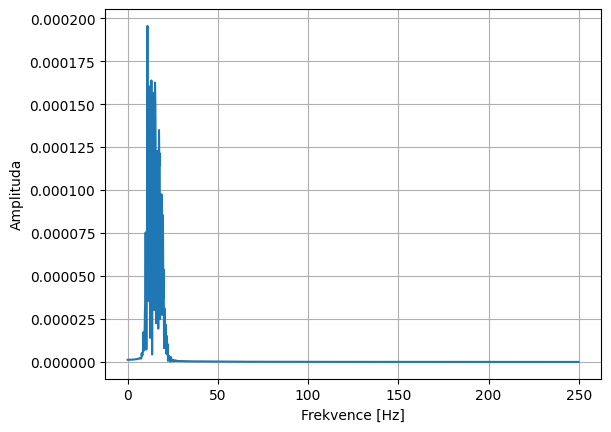

In [24]:
# Filtrace
def filtr(b, a, sgl):
    sgl_filt = filtfilt(b, a, sgl)
    return sgl_filt

# Vykreslení signálu
def vykresleni(t, sgl, sgl_filt):
    plt.figure(figsize=(10, 4))
    plt.plot(t, sgl, label='původní signál')
    plt.plot(t, sgl_filt, label='vyfiltrovaný signál')
    plt.title('Porovnání původního a vyfiltrovaného signálu')
    plt.xlabel('Čas [s]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    plt.legend()
    plt.show()

# spočítejte a zobrazte jejich spektra
def spektra(sgl, sgl_filt, fs):
    res_spec(sgl, fs)
    res_spec(sgl_filt, fs)

vykresleni(t, sgl, filtr(b, a, sgl))
spektra(sgl, filtr(b, a, sgl), fs)


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



V nefiltrovaném signálu vidíme různé frekvence, které jsou stále přítomny za hranicemi, které potřebujeme (v tomto případě za 10-20 Hz), v tomto spektru budou patrné vysokofrekvenční složky v rozmezí 10-20 Hz, zatímco filtrovaný signál by měl obsahovat potlačené vysokofrekvenční složky mimo 10-20 Hz. A pokud mluvíme o spektru, tak také filtrovaný signál musí obsahovat potlačené vysokofrekvenční složky mimo 10-20 Hz.

Teoreticky největší posun při jednostranné filtraci se týká fázového posunu. Jednostranná filtrace by způsobila fázový posun ve směru filtru, což by pravděpodobně ovlivnilo vyrovnání časových signálů.

## 4.4 [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

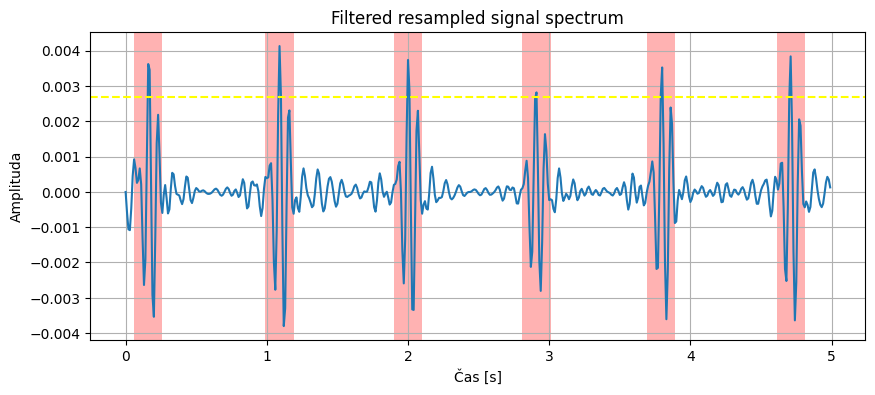

In [64]:
# QRS v časové doméně
def resample(sgl, fs):
    resRAT = 100 / fs
    freq_n = 0.5 * fs
    freq_c = 0.4 * 100
    b1 = signal.firwin(5, cutoff=(freq_c / freq_n))
    filtered_signal = signal.lfilter(b1, 1.0, sgl)
    return signal.resample(filtered_signal, int(len(sgl) * resRAT))

sig_resamp = resample(sgl, fs)
x1, y1 = signal.butter(5, [10 / (0.5 * 100), 20 / (0.5 * 100)], btype='bandpass')

# Filter resampled
rf_signal = filtr(x1, y1, sig_resamp)
duration = np.arange(rf_signal.size)/100

#  amplitude
ampl = np.abs(np.fft.fft(rf_signal))
#  treshold
treshold = max(rf_signal) * 0.65

plt.figure(figsize=(10, 4))
plt.plot(duration, rf_signal)
plt.axhline(y=treshold, color='yellow', linestyle='--')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.title("Filtered resampled signal spectrum")

# highlight QRS
i = 0
while i < duration.size:
  if rf_signal[i] > treshold:
    highlight_rect = plt.Rectangle((duration[i - 10], -0.0055), duration[i + 20] - duration[i],
                               0.011, facecolor='red', alpha=0.3)
    plt.gca().add_patch(highlight_rect)
    i += 20
  else:
    i += 1

plt.grid()



b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

[(13, 19), (105, 111), (197, 202), (377, 382), (468, 473)]


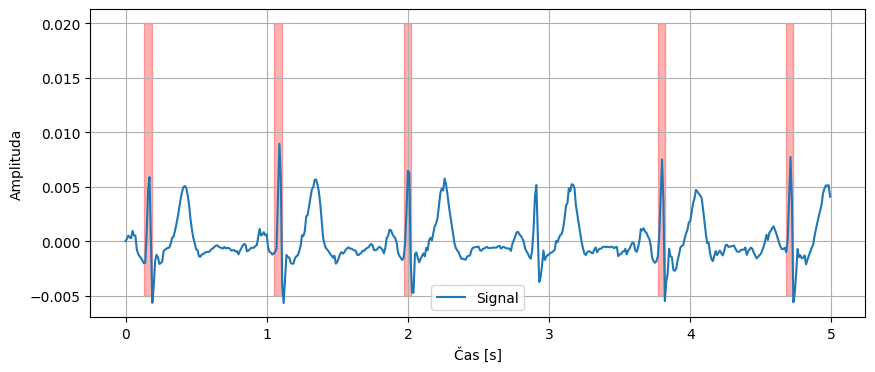

In [115]:
x2, y2 = signal.butter(4, 0.5, btype='low')
filter_lev = signal.lfilter(x2, y2, sgl)


down_d = filter_lev[::fs // 100]
down_d_t = np.arange(0, len(down_d) / 100, 1 / 100)
dur_res = np.arange(sig_resamp.size)/100

maxes = []
qrs_ind = []
begin = 0


# ----------------------------------

down_d = filter_lev[::fs // 100]

un_r = max(sig_resamp)
r_index_t = np.where(sig_resamp == un_r)
idx_r = r_index_t[0][0]

un_q = min(sig_resamp[idx_r - 10 : idx_r])
q_index_t = np.where(sig_resamp == un_q)
idx_q = q_index_t[0][0]

# Find right minimum 10 steps from max => S
un_s = min(sig_resamp[idx_r : idx_r + 10])
s_index_t = np.where(sig_resamp == un_s)
idx_s = s_index_t[0][0]

qrs_compl = sig_resamp[idx_q : idx_s]

for indx, resls in enumerate(signal.correlate(down_d, qrs_compl, mode='full')):
  if resls > treshold:
    maxes.append(indx)

for i in range(len(maxes) - 1):
    if maxes[i + 1] - maxes[i] > 10:
        qrs_ind.append((maxes[begin] - 5, maxes[i]))
        begin = i + 1
qrs_ind.append((maxes[begin] - 5, maxes[len(maxes) - 1]))
print(qrs_ind)

plt.figure(figsize=(10, 4))
plt.plot(down_d_t, down_d, label='Signal')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")

for begin, end in qrs_ind:
  rect = plt.Rectangle((down_d_t[begin], -0.005),
                         down_d_t[end] - down_d_t[begin],
                         0.025,
                         color='red', alpha=0.3)
  plt.gca().add_patch(rect)
plt.grid()
plt.legend()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

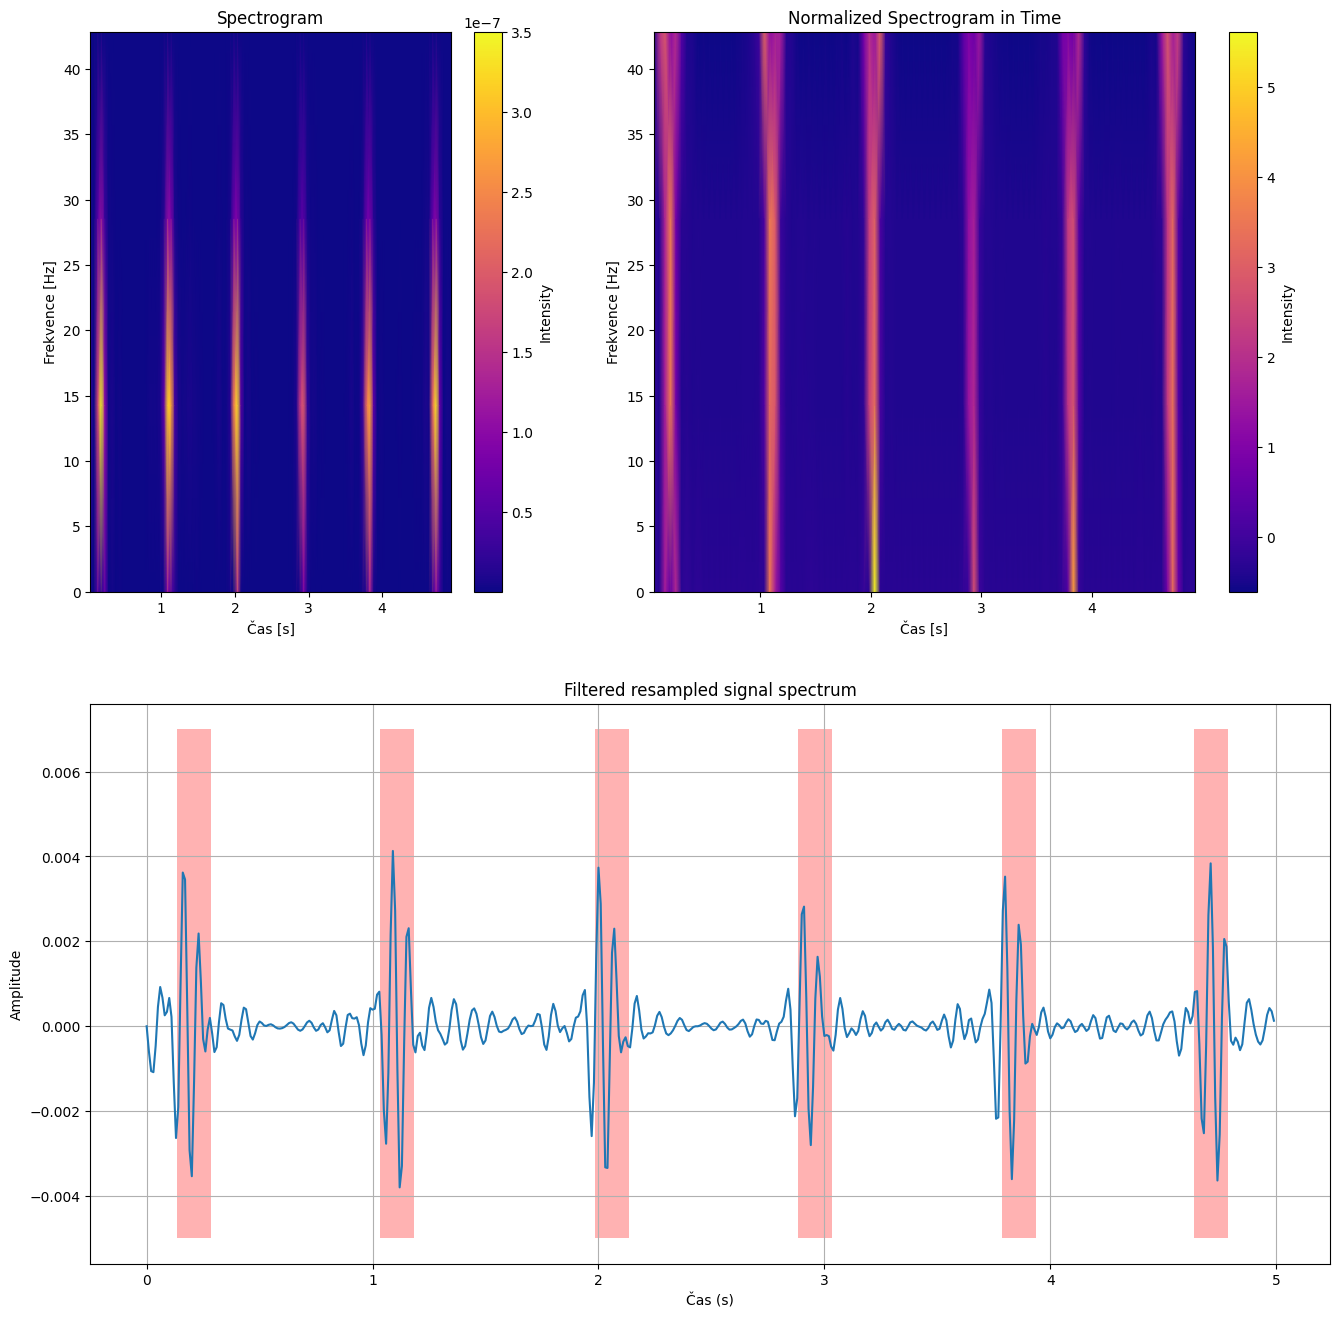

In [125]:
# Parameters
window_len = 7
hop_size = 5

#  spectrogram
fre_f, time_f_vec, sxF = signal.spectrogram(rf_signal, fs=100, window='hann',
                                     nperseg=window_len, noverlap=window_len - hop_size)

# Show spectrum
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.5])

ax_1 = fig.add_subplot(gs[0, 0])

pcm = ax_1.pcolormesh(time_f_vec, fre_f, sxF, shading='gouraud', cmap='plasma')
cbar = plt.colorbar(pcm, ax=ax_1)
cbar.set_label("Intensity")
ax_1.set_xlabel("Čas [s]")
ax_1.set_ylabel("Frekvence [Hz]")
ax_1.set_title("Spectrogram")

normal_z = (sxF - np.mean(sxF, axis=1, keepdims=True)) / np.std(sxF, axis=1, keepdims=True)

ax_2 = fig.add_subplot(gs[0, 1])

pcm = ax_2.pcolormesh(time_f_vec, fre_f, normal_z, shading='gouraud', cmap='plasma')
cbar = plt.colorbar(pcm, ax=ax_2)
cbar.set_label("Intensity")
ax_2.set_xlabel("Čas [s]")
ax_2.set_ylabel("Frekvence [Hz]")
ax_2.set_title("Normalized Spectrogram in Time")

energy_sums = np.sum(np.abs(normal_z) ** 2, axis=0)

ax_3 = fig.add_subplot(gs[1, :])

ax_3.plot(duration, rf_signal)
ax_3.set_xlabel("Čas (s)")
ax_3.set_ylabel("Amplitude")
ax_3.set_title("Filtered resampled signal spectrum")
ax_3.grid()

x = 2
while x < energy_sums.size:

  if energy_sums[x - 2] + energy_sums[x - 1] < energy_sums[x]:
    ax_3.add_patch(plt.Rectangle((time_f_vec[x], -0.005), 0.15, 0.012, facecolor='red', alpha=0.3))
    x += 2
  x += 1

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

0.0021403159313228065


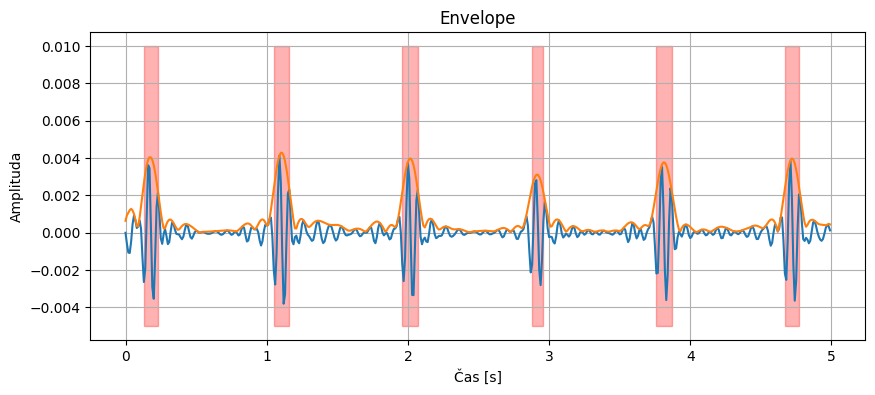

In [140]:
fff_rf = np.fft.fft(rf_signal)
rf_Nf = len(np.abs(np.fft.fft(rf_signal)))
rf_Nf2 = rf_Nf // 2

hil_trans = np.concatenate((fff_rf[0 : 1], fff_rf[1 : rf_Nf2 - 1] * 2, fff_rf[rf_Nf2 - 1 : rf_Nf2 ], fff_rf[ rf_Nf2 : ] * 0))

# Invert
envel = np.abs(np.fft.ifft(hil_trans))

# Plot
plt.figure(figsize=(10, 4))
plt.plot(duration, rf_signal)
plt.plot(duration, envel)
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.title("Envelope")
plt.grid()


qrs = np.where(envel > treshold)[0]

threshold = np.max(envel) * 0.5
qrs = np.where(envel > threshold)[0]

in_qr = []
begin = 0

for i in range(len(qrs) - 1):
    if qrs[i + 1] - qrs[i] > 10:
        in_qr.append((qrs[begin], qrs[i]))
        begin = i + 1
in_qr.append((qrs[begin], qrs[len(qrs) - 1]))

for begin, end in in_qr:
  rect = plt.Rectangle((down_d_t[begin], -0.005),
                         down_d_t[end] - down_d_t[begin],
                         0.015,
                         color='red', alpha=0.3)
  plt.gca().add_patch(rect)
print(threshold)

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Některé metody jsou citlivé na polaritu signálu, zatímco jiné jsou invariantní vůči otočení.
Například:

1) Amplitudová analýza vadí, Pokud je použita metoda založená na amplitudové analýze (například prahování), otočení signálu může způsobit, že póly QRS komplexu budou chybně interpretovány.

2)Časová analýza vadí, pokud metody založené na časové analýze mohou být ovlivněny otočením signálu, zejména pokud jsou závislé na časovém průběhu vln.

Nebo například

1) korelační metoda, citlivost k polaritě: nejčastěji invariantní;
protože korelační metoda porovnává podobnost mezi vzorem QRS a signálem. Při otočení signálu dochází k inverzi amplitudy, ale tvar signálu zůstává stejný, což umožňuje správnou detekci.

2) Frekvenční metody, jako je například transformace Fourierovy řady, jsou obvykle invariantní vůči fázi a polaritě. Detekce se provádí na základě frekvenčních charakteristik, které zůstávají nezměněny po otočení signálu.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód